In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9',]
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\Glass\Glass_NE_20.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
0,1.52101,13.64,4.49,1.10,NaN,0.06,NaN,0.00,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0
2,NaN,13.53,NaN,1.54,72.99,0.39,7.78,0.00,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,NaN,0.00,0.0
4,1.51742,13.27,NaN,1.24,73.08,0.55,NaN,0.00,NaN
...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,NaN,9.18,1.06,0.0
210,1.51685,NaN,NaN,1.99,73.06,0.00,8.40,NaN,0.0
211,NaN,NaN,NaN,2.02,NaN,0.00,8.44,1.64,0.0
212,NaN,14.38,0.00,1.94,NaN,NaN,8.48,NaN,0.0


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	73
float64		column 2	53
float64		column 3	53
float64		column 4	0
float64		column 5	73
float64		column 6	30
float64		column 7	30
float64		column 8	40
float64		column 9	20


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
count,141.000000,161.000000,161.000000,214.000000,141.000000,184.000000,184.000000,174.000000,194.000000
mean,1.518274,13.369006,2.869876,1.444907,72.726596,0.491087,8.901848,0.168046,0.053454
std,0.002525,0.735073,1.297446,0.499270,0.634476,0.546656,1.373425,0.499368,0.095190
min,1.513160,11.020000,0.000000,0.290000,69.890000,0.000000,5.430000,0.000000,0.000000
25%,1.516650,12.970000,2.810000,1.190000,72.490000,0.157500,8.237500,0.000000,0.000000
50%,1.517780,13.290000,3.480000,1.360000,72.830000,0.560000,8.600000,0.000000,0.000000
75%,1.518980,13.700000,3.610000,1.630000,73.060000,0.602500,9.072500,0.000000,0.090000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,14.960000,3.150000,0.510000


<AxesSubplot:>

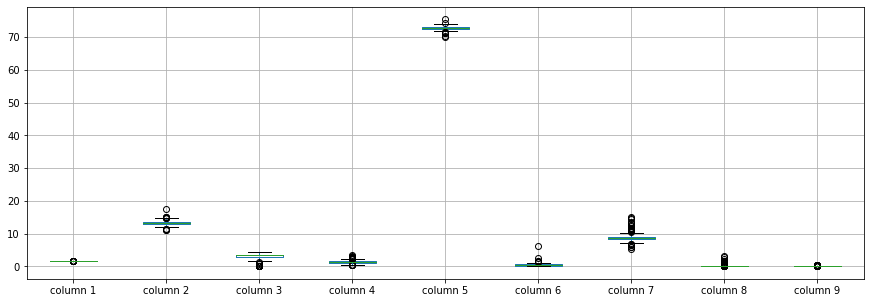

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1     1.518274
column 2    13.369006
column 3     2.869876
column 4     1.444907
column 5    72.726596
column 6     0.491087
column 7     8.901848
column 8     0.168046
column 9     0.053454
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
column 1,1.000000,-0.106111,0.042460,-0.527844,-0.200895,-0.311890,0.648178,-0.096271,0.124012
column 2,-0.106111,1.000000,-0.121590,0.133168,0.005620,-0.366395,-0.328454,0.323337,-0.239173
column 3,0.042460,-0.121590,1.000000,-0.349598,-0.209008,0.234272,-0.482389,-0.302800,0.089630
column 4,-0.527844,0.133168,-0.349598,1.000000,-0.084337,0.270196,-0.260123,0.479434,-0.059905
column 5,-0.200895,0.005620,-0.209008,-0.084337,1.000000,-0.316927,-0.082538,-0.111329,-0.028555
column 6,-0.311890,-0.366395,0.234272,0.270196,-0.316927,1.000000,-0.347759,0.035409,0.001304
column 7,0.648178,-0.328454,-0.482389,-0.260123,-0.082538,-0.347759,1.000000,-0.090220,0.091259
column 8,-0.096271,0.323337,-0.302800,0.479434,-0.111329,0.035409,-0.090220,1.000000,-0.026973
column 9,0.124012,-0.239173,0.089630,-0.059905,-0.028555,0.001304,0.091259,-0.026973,1.000000


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [57]:
imputer = md.Midas(layer_structure = [9,9+67,9+67+67,9+67+67+67,9+67+67+67+67,9+67+67+67+67+67,9+67+67+67+67,9+67+67+67,9+67+67,9+67,9], vae_layer = False, seed = 9)
imputer.build_model(df)
imputer.train_model(training_epochs=50)


Size index: [9]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 71.91316311176007
Epoch: 1 , loss: 71.62663298386794
Epoch: 2 , loss: 71.19420799842247
Epoch: 3 , loss: 71.2084479698768
Epoch: 4 , loss: 71.23351346529446
Epoch: 5 , loss: 71.27376791147086
Epoch: 6 , loss: 70.85642447838417
Epoch: 7 , loss: 71.64936359112079
Epoch: 8 , loss: 71.61975625845102
Epoch: 9 , loss: 71.35292287973257
Epoch: 10 , loss: 71.38528207632211
Epoch: 11 , loss: 71.53000259399414
Epoch: 12 , loss: 70.69617520845853
Epoch: 13 , loss: 71.45379051795372
Epoch: 14 , loss: 71.02218217116136
Epoch: 15 , loss: 71.42076110839844
Epoch: 16 , loss: 71.99024787315956
Epoch: 17 , loss: 71.26436820397011
Epoch: 18 , loss: 70.70169771634616
Epoch: 19 , loss: 71.263426560622
Epoch: 20 , loss: 69.58712944617638
Epoch: 21 , loss: 69.58094934316782
Epoch: 22 , loss: 69.318846482497
Epoch: 23 , loss: 68.190489255465
Epoch: 24 , loss: 67.49444139920749
Epoch: 25 , loss: 67.34905213576097
Epoch: 26 , lo

In [58]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(214, 9)

In [59]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1     0.402544
column 2    14.770000
column 3     0.908929
column 4     0.290000
column 5    72.020000
column 6     0.030000
column 7     9.000000
column 8     0.000000
column 9     0.000000
Name: 21, dtype: float64

In [60]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\Glass.xlsx', header=None,names=column_names)

In [61]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
0,0.000000,0.000000,0.000000,0.0,47.508231,0.000000,5.950576,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
2,-0.533883,0.000000,-0.862400,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,-2.179494,0.000000,0.000000
4,0.000000,0.000000,-0.768338,0.0,0.000000,0.000000,0.159188,0.000000,-0.005792
...,...,...,...,...,...,...,...,...,...
209,0.000000,0.000000,0.000000,0.0,0.000000,0.012502,0.000000,0.000000,0.000000
210,0.000000,-1.341595,3.729618,0.0,0.000000,0.000000,0.000000,-1.265118,0.000000
211,-0.358209,-4.383403,2.523028,0.0,-24.121077,0.000000,0.000000,0.000000,0.000000
212,-1.119559,0.000000,0.000000,0.0,-45.117830,0.198980,0.000000,-1.430288,0.000000


Calculating NRMSE Value

In [62]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [63]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [64]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(315.633840522446, 1090.4359815890969)

In [65]:
NRMS=numerator/denominator
NRMS


0.2894565530224631

In [66]:
new_df.iloc[66,:]

column 1     1.521520
column 2    13.050000
column 3     1.213819
column 4     0.870000
column 5    25.805641
column 6     0.190000
column 7     2.676984
column 8     0.000000
column 9     0.170000
Name: 66, dtype: float64

In [67]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
0,1.521010,13.640000,4.490000,1.10,119.288231,0.060000,14.700576,0.000000,0.000000
1,1.517610,13.890000,3.600000,1.36,72.730000,0.480000,7.830000,0.000000,0.000000
2,0.982297,13.530000,2.687600,1.54,72.990000,0.390000,7.780000,0.000000,0.000000
3,1.517660,13.210000,3.690000,1.29,72.610000,0.570000,6.040506,0.000000,0.000000
4,1.517420,13.270000,2.851662,1.24,73.080000,0.550000,8.229188,0.000000,-0.005792
...,...,...,...,...,...,...,...,...,...
209,1.516230,14.140000,0.000000,2.88,72.610000,0.092502,9.180000,1.060000,0.000000
210,1.516850,13.578405,3.729618,1.99,73.060000,0.000000,8.400000,0.324882,0.000000
211,1.162441,9.976597,2.523028,2.02,49.298923,0.000000,8.440000,1.640000,0.000000
212,0.396951,14.380000,0.000000,1.94,28.492170,0.198980,8.480000,0.139712,0.000000


In [68]:
imputations[-1].to_excel("Glass_NE_20(imp).xlsx", index=False, header=False)